<a href="https://colab.research.google.com/github/afrojaakter/Popular-ML-Algorithms/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Support Vector Machine (SVM) Algorithm
SVM is one the popular supervised learning algorithm used for both classification and regression. It is known for its kernel trich to handle nonlinear input data. It is used in different applizations such as face detection,image classification, text categorization, intrusion detection, email classification, classification of new articles and web pages, genres and handwriting recognition. 


SVM creates the best line/decision/hyperplne boundary that seperate  n-dimensional space (with largest margin) into classes so any new data points falls into the right category.

SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane that best divided the dataset into classes.


**Support Vectors:** SVs are the data points closest to the hyperplane, which helps the SVM to define the separating line with largest margin. 


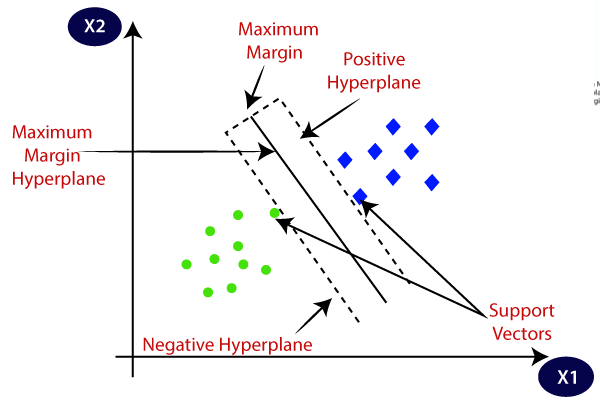

####Types of SVM
SVM can be of two types:

- **Linear SVM:** Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.
- **Non-linear SVM:** Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

####Hyperplane and Support Vectors in the SVM algorithm:
**Hyperplane:** 

This best boundary is the one with largest decision margin, is known as the hyperplane of SVM.

Hyperplane dimension depend on the features dimension of the dataset. For example for 2D features hyperplane dimension would be a straight line. 


###How does SVM work?

The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:


**Linear SVM:**

Suppose the dataset that has two classes(green and red), and two features x and y. We want a classifier that can classify the pair(x, y) of coordinates in either green or blue. 

So as it is 2-d space so by just using a straight line, we can easily separate these two classes. But there can be multiple lines that can separate these classes. Consider the below image:



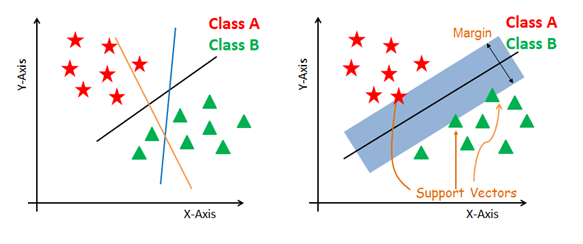

**Non-Linear SVM:**

If data is linearly arranged, then we can separate it by using a straight line, but for non-linear data, we cannot draw a single straight line. Consider the below image:

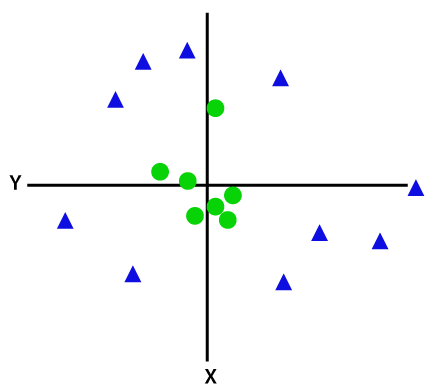

So to separate these data points, we need to add one more dimension. For linear data, we have used two dimensions x and y, so for non-linear data, we will add a third dimension $z = x^2 + y^2$ . 

By adding the third dimension, the sample space will become as below image. 

So now, SVM will divide the datasets into classes in the following way. 


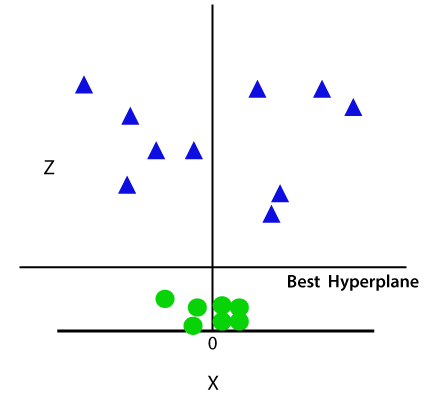



Since we are in 3-d Space, hence it is looking like a plane parallel to the x-axis. If we convert it in 2d space with z=1, then it will become as:

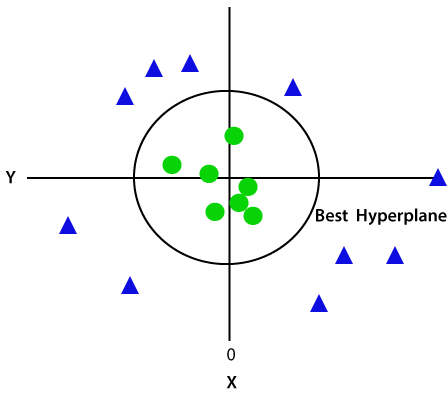

Hence we get a circumference of radius 1 in case of non-linear data.

####Python Implementation of Support Vector Machine

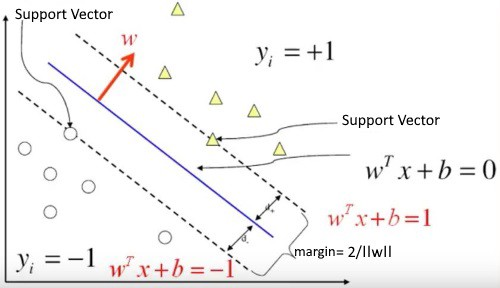

Example: There are email messages and we want dectect spam emails, then:
- An instance email message xᵢ is defined as an n-dimensional feature vector that can be plotted on n-dimensional space.
- The feature vector, as the name explains, contains features (eg. word count, link count, etc.) of email message in numerical form
- Each feature vector is labeled with a class yᵢ
- The class yᵢ can either be a +ve or -ve (eg. spam=1, not-spam=-1)

Using this dataset the algorithm finds a hyperplane (or decision boundary) which should ideally have the following properties:
- It creates separation between examples of two classes with a maximum margin
- Its equation (w.x + b = 0) yields a value ≥ 1 for examples from+ve class and ≤-1 for examples from -ve class

**How does it find this hyperplane?** By finding the optimal values w* (weights/normal) and b* (intercept) which define this hyperplane. The optimal values are found by minimizing a cost function: 
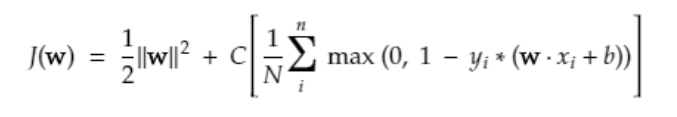
Once the algorithm identifies these optimal values, the SVM model f(x) is then defined as shown below: $$f(x) = sign(w^\ast . x + b^\ast)$$


In [22]:
import numpy as np  
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle

In [ ]:
def compute_cost(w, x, y):
  #compute hinge loss
  N = x.shape[0]
  distances = 1 - y* (np.dot(x, w)) #b is missing since we pusehd it into X by adding 1
  distances[distances < 0] = 0 # equivalent to max(0, distance)
  hinge_loss = regularization_strength * (np.sum(distances)/N)

  #compute cost
  cost = 1/2 * np.dot(w, w) + hinge_loss
  return cost


#### The Gradient of Cost Function: 

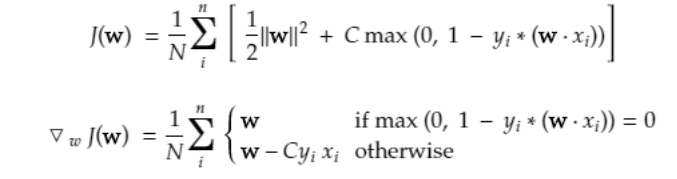

In [17]:
# Model training
def calculate_cost_gradient(w, x_batch, y_batch):
  #if one example is passed (eg. in case of SGD)
  if type(y_batch) == np.float64:
    y_batch = np.array([y_batch])
    x_batch = np.array([x_batch])

  distance = 1 - (y_batch * np.dot(x_batch, w))
  dw = np.zeros(len(w))

  for idx, d in enumerate(distance):
    if max(0,d) == 0:
      di = w
    else: 
      di = w - (regularization_strength * y_batch[idx] * x_batch[idx])
    dw += di
  dw = dw/len(y_batch)
  return dw 

####Train Model Using SGD
 In order to achieve our desired model we need to minimize the cost function. We can do that by:
 
 1. Minimize $||w||^2$
 2. Minimize the sum of hinge loss: $max(0, 1- y *(w.x_i + b))$

 To optimize the loss funciton I will use Stochastic Gradient Descent (SGD) algorithm.

In [ ]:

def sgd(X, y):
  max_epochs = 5000
  w = np.zeros(X.shape[1])
  n = 0
  prev_cost = float('inf')
  cost_threshold = 0.01 #in percent

  #stochastic gradient descent
  for epoch in range(1, max_epochs):
    #shuffle to prevent repeatin gupdate cycles
    X, y = shuffle(X, y)
    for idx, x in enumerate(X):
      dJw = calculate_cost_gradient(w, x, y[idx])
      w = w -  (learning_rate * dJw)
    
    # Check results on every 2^n th epoch
    if epoch ==  2**n or epoch == max_epochs - 1:
      cost = compute_cost(w, X, y)
      print("Epoch is: {} and Cost is: {}".format(epoch, cost))
      
      #stoping criterion
      if abs(prev_cost - cost) < cost_threshold * prev_cost:
        return w 
      prev_cost = cost
      n += 1
  return w

####Reading the Dataset
I’ll be working with a breast cancer dataset available on [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). The features in the dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe the characteristics of the cell nuclei present in the image. Based on these features I will train a SVM model to detect if the mass is benign B (generally harmless) or malignant M (cancerous).

In [12]:
def remove_correated_features(x):
  '''Feature selection'''
  corr_treshold = 0.9
  corr = x.corr()
  drop_columns =  np.full(corr.shape[0], False, dtype=bool)
  for i in range(corr.shape[0]):
    for j in range(i + 1, corr.shape[0]):
      if corr.iloc[i, j] >= corr_treshold:
        drop_columns[j] = True
  columns_dropped = x.columns[drop_columns]
  x.drop(columns_dropped, axis = 1, inplace=True)
  return columns_dropped

def remove_less_significant_features(x, y):
  sl = 0.05
  regression_ols = None
  columns_dropped = np.array([])
  for itr in range(len(x.columns)):
    regression_ols = sm.OLS(y, x).fit()
    max_col = regression_ols.pvalues.idxmax()
    max_val = regression_ols.pvalues.max()
    if max_val > sl:
      x.drop(max_col, axis = 'columns', inplace = True)
      columns_dropped = np.append(columns_dropped, [max_col])
    else: break
  regression_ols.summary()
  return columns_dropped

In [23]:
def init():
  print('reading dataset...')
  data = pd.read_csv('./data.csv')

  #drop the last column (an extra col added by pandas) and the index column
  data.drop(data.columns[[-1, 0]], axis = 1, inplace = True)

  print('applying feature engineering...')
  # convert categorical labels to numeric values +1 and -1
  #The diagnosis of breast tissues (M = malignant, B = benign)
  diag_map =  {'M' : 1.0, 'B': -1.0}
  data['diagnosis'] = data['diagnosis'].map(diag_map)

  # seperating features and lables
  Y = data.loc[:, 'diagnosis']  #label column
  X = data.iloc[:, 1:] #all rows of of col 1 and ahead

  #filter features
  remove_correated_features(X)
  remove_less_significant_features(X, Y)

  # normalizing the data using using MinMaxScalar
  x_normalized = MinMaxScaler().fit_transform(X.values)
  X = pd.DataFrame(x_normalized)

  #insert 1 in every row for intercept b
  X.insert(loc = len(X.columns), column = 'intercept', value = 1)

  #split train and test data
  print("splitting train and test data...")
  x_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                      test_size = 0.2, 
                                                      random_state = 42)
  #train the model
  print('training started...')
  w = sgd(x_train.to_numpy(), y_train.to_numpy())
  print('training finished.')
  print('weights are: {}'.format(w))

  #test the model
  print('testing the model...')
  y_train_pred = np.array([])
  for i in range(x_train.shape[0]):
    yp = np.sign(np.dot(x_train.to_numpy()[i], w))
    y_train_pred = np.append(y_train_pred, yp)
  
  y_test_pred = np.array([])
  for i in range(X_test.shape[0]):
    yp = np.sign(np.dot(X_test.to_numpy()[i], w))
    y_test_pred =  np.append(y_test_pred, yp)
  
  print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_test_pred)))
  print("recall on test dataset: {}".format(recall_score(y_test, y_test_pred)))
  print("precision on test dataset: {}".format(recall_score(y_test, y_test_pred)))
    
# set hyper-parameters and call init
regularization_strength = 10000
learning_rate = 0.000001
init()


reading dataset...
applying feature engineering...
splitting train and test data...
training started...
Epoch is: 4999 and Cost is: 1042.7824269393748
training finished.
weights are: [ 3.53000686 11.33189523 -2.31212749 -7.97944881 10.2171857  -1.22943888
 -7.25258305  2.08079864 -3.6125261   3.14952782  4.9430544   4.8540873
 -4.69724998]
testing the model...
accuracy on test dataset: 0.9824561403508771
recall on test dataset: 0.9534883720930233
precision on test dataset: 0.9534883720930233


Refrence: 
1. [javaTpoint](https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm)
2. [Data Camp](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)
3. [SVM From Scratch](https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2)